In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
from nltk import download
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

In [0]:
import sys
sys.path.append('drive/My Drive/yelp_sentiment_analysis')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization

# Load Dataset

In [0]:
data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train.json",
                                          "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")

In [8]:
data_train.head()

,review,sentiment
0,"The food was great and unique, we both loved i...",5
1,"So disappointing, don't know if it's the chang...",2
2,"Nice staff and good food, but seems like an un...",3
3,Average Joe's is definitely not average at all...,5
4,"Everything about this place is perfectly fine,...",2


In [9]:
data_train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
data_test.head()

,review,sentiment
0,Dropped by on a week night because I was reall...,4
1,"4 of us waited 30 mins for the coffee, got up ...",1
2,Twenty-two dollars for two people for a lunch ...,4
3,I love this place! Great location in the heart...,5
4,I walked an hour across town to get here becau...,5


In [11]:
data_test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- Unigram
- No stop word removal
- No normalization (stemming/lemmai

In [16]:
baseline = Pipeline([
    ('preprocessor', features.PreProcessor(stopwords=None,
                                           stemmer=None,
                                           lemmatizer=None,
                                           pos_tagger=None))
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

TypeError: ignored

In [16]:
baseline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_baseline = baseline.predict(X_train)

In [80]:
print(classification_report(y_train, y_train_pred_baseline, digits=4))

              precision    recall  f1-score   support

           1     0.6259    0.6942    0.6583     25559
           2     0.5014    0.4265    0.4609     28269
           3     0.5521    0.5441    0.5481     48787
           4     0.6233    0.6075    0.6153     89012
           5     0.7016    0.7400    0.7203     80288

    accuracy                         0.6246    271915
   macro avg     0.6009    0.6025    0.6006    271915
weighted avg     0.6212    0.6246    0.6222    271915



In [0]:
y_test_pred_baseline = baseline.predict(X_test)

In [81]:
print(classification_report(y_test, y_test_pred_baseline, digits=4))

              precision    recall  f1-score   support

           1     0.6001    0.6581    0.6278      8611
           2     0.3985    0.3311    0.3617      9251
           3     0.4687    0.4537    0.4611     16367
           4     0.5549    0.5488    0.5518     29780
           5     0.6609    0.7001    0.6799     26630

    accuracy                         0.5643     90639
   macro avg     0.5366    0.5384    0.5365     90639
weighted avg     0.5588    0.5643    0.5609     90639



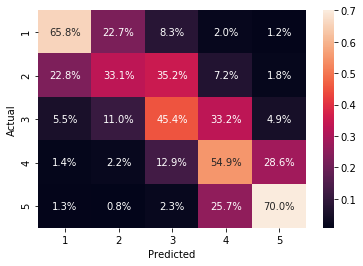

In [21]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_baseline,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 1 - N-Grams

Unigram + Bigrams

In [0]:
bigrams = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [23]:
bigrams.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_bigrams = bigrams.predict(X_train)

In [25]:
print(classification_report(y_train, y_train_pred_bigrams, digits=4))

              precision    recall  f1-score   support

           1       0.88      0.78      0.83     25559
           2       0.92      0.58      0.71     28269
           3       0.77      0.77      0.77     48787
           4       0.77      0.91      0.83     89012
           5       0.90      0.86      0.88     80288

    accuracy                           0.82    271915
   macro avg       0.85      0.78      0.80    271915
weighted avg       0.83      0.82      0.82    271915



In [0]:
y_test_pred_bigrams = bigrams.predict(X_test)

In [27]:
print(classification_report(y_test, y_test_pred_bigrams, digits=4))

              precision    recall  f1-score   support

           1       0.72      0.57      0.64      8611
           2       0.42      0.11      0.18      9251
           3       0.41      0.33      0.37     16367
           4       0.50      0.79      0.61     29780
           5       0.74      0.58      0.65     26630

    accuracy                           0.56     90639
   macro avg       0.56      0.48      0.49     90639
weighted avg       0.57      0.56      0.54     90639



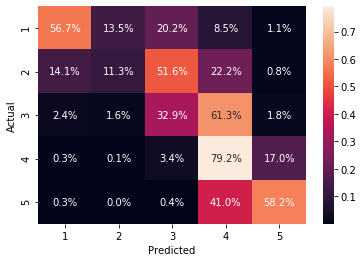

In [28]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_bigrams,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

Unigram + Bigrams + Trigrams

In [0]:
trigrams = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('nb', MultinomialNB())
])

In [30]:
trigrams.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_trigrams = trigrams.predict(X_train)

In [32]:
print(classification_report(y_train, y_train_pred_trigrams, digits=4))

              precision    recall  f1-score   support

           1       0.99      0.85      0.91     25559
           2       0.99      0.76      0.86     28269
           3       0.91      0.90      0.91     48787
           4       0.87      0.98      0.92     89012
           5       0.98      0.96      0.97     80288

    accuracy                           0.93    271915
   macro avg       0.95      0.89      0.91    271915
weighted avg       0.93      0.93      0.93    271915



In [0]:
y_test_pred_trigrams = trigrams.predict(X_test)

In [34]:
print(classification_report(y_test, y_test_pred_trigrams, digits=4))

              precision    recall  f1-score   support

           1       0.83      0.39      0.53      8611
           2       0.40      0.03      0.05      9251
           3       0.30      0.12      0.18     16367
           4       0.41      0.90      0.57     29780
           5       0.80      0.43      0.56     26630

    accuracy                           0.48     90639
   macro avg       0.55      0.37      0.38     90639
weighted avg       0.54      0.48      0.44     90639



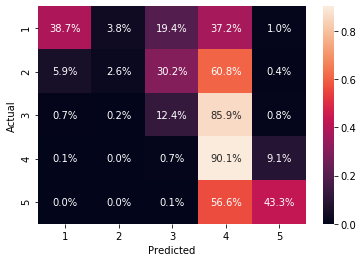

In [35]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_trigrams,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 2 - Remove Non-Words/Numbers

In [0]:
regexp = Pipeline([
    ('vect', CountVectorizer(tokenizer=RegexpTokenizer(pattern=r'[a-zA-Z0-9]+').tokenize)),
    ('nb', MultinomialNB())
])

In [37]:
regexp.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_regexp = regexp.predict(X_train)

In [39]:
print(classification_report(y_train, y_train_pred_regexp, digits=4))

              precision    recall  f1-score   support

           1       0.63      0.70      0.66     25559
           2       0.50      0.43      0.46     28269
           3       0.55      0.54      0.55     48787
           4       0.62      0.60      0.61     89012
           5       0.70      0.74      0.72     80288

    accuracy                           0.62    271915
   macro avg       0.60      0.60      0.60    271915
weighted avg       0.62      0.62      0.62    271915



In [0]:
y_test_pred_regexp = regexp.predict(X_test)

In [41]:
print(classification_report(y_test, y_test_pred_regexp, digits=4))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      8611
           2       0.40      0.34      0.37      9251
           3       0.47      0.46      0.46     16367
           4       0.56      0.54      0.55     29780
           5       0.66      0.70      0.68     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



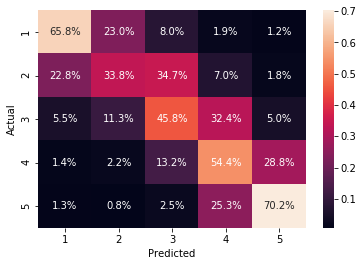

In [42]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_regexp,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 3 - Remove Stopwords

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stopwords = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
    ('nb', MultinomialNB())
])

In [46]:
stopwords.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
   

In [0]:
y_train_pred_stopwords = stopwords.predict(X_train)

In [48]:
print(classification_report(y_train, y_train_pred_stopwords, digits=4))

              precision    recall  f1-score   support

           1       0.64      0.71      0.67     25559
           2       0.53      0.44      0.48     28269
           3       0.56      0.54      0.55     48787
           4       0.62      0.62      0.62     89012
           5       0.70      0.73      0.72     80288

    accuracy                           0.63    271915
   macro avg       0.61      0.61      0.61    271915
weighted avg       0.63      0.63      0.63    271915



In [0]:
y_test_pred_stopwords = stopwords.predict(X_test)

In [50]:
print(classification_report(y_test, y_test_pred_stopwords, digits=4))

              precision    recall  f1-score   support

           1       0.61      0.67      0.64      8611
           2       0.41      0.33      0.36      9251
           3       0.47      0.44      0.45     16367
           4       0.55      0.56      0.55     29780
           5       0.66      0.69      0.67     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



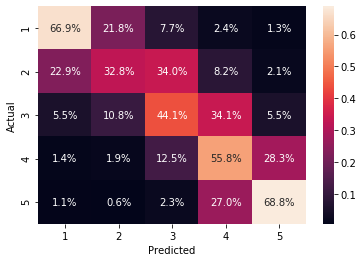

In [51]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_stopwords,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 4 - Stemming

In [0]:
stemmer = PorterStemmer()
analyzer_stemmer = CountVectorizer().build_analyzer()

In [0]:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer_stemmer(doc))

In [0]:
stemming = Pipeline([
    ('vect', CountVectorizer(analyzer=stemmed_words)),
    ('nb', MultinomialNB())
])

In [55]:
stemming.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function stemmed_words at 0x7fc379676598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_stemming = stemming.predict(X_train)

In [57]:
print(classification_report(y_train, y_train_pred_stemming, digits=4))

              precision    recall  f1-score   support

           1       0.61      0.69      0.64     25559
           2       0.47      0.41      0.44     28269
           3       0.53      0.52      0.53     48787
           4       0.61      0.59      0.60     89012
           5       0.69      0.73      0.71     80288

    accuracy                           0.61    271915
   macro avg       0.58      0.59      0.58    271915
weighted avg       0.61      0.61      0.61    271915



In [0]:
y_test_pred_stemming = stemming.predict(X_test)

In [59]:
print(classification_report(y_test, y_test_pred_stemming, digits=4))

              precision    recall  f1-score   support

           1       0.59      0.66      0.62      8611
           2       0.38      0.33      0.35      9251
           3       0.47      0.45      0.46     16367
           4       0.55      0.54      0.55     29780
           5       0.66      0.70      0.68     26630

    accuracy                           0.56     90639
   macro avg       0.53      0.54      0.53     90639
weighted avg       0.56      0.56      0.56     90639



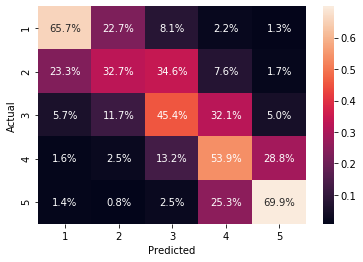

In [60]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_stemming,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 5 - Lemmatization

In [68]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lemmer = WordNetLemmatizer()
analyzer_lemmer = CountVectorizer().build_analyzer()

In [0]:
def lemmatized_words(doc):
    return (lemmer.lemmatize(w, "v") for w in analyzer_lemmer(doc))

In [0]:
lemmatization = Pipeline([
    ('vect', CountVectorizer(analyzer=lemmatized_words)),
    ('nb', MultinomialNB())
])

In [71]:
lemmatization.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function lemmatized_words at 0x7fc382878598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
y_train_pred_lemmatization = lemmatization.predict(X_train)

In [79]:
print(classification_report(y_train, y_train_pred_lemmatization, digits=4))

              precision    recall  f1-score   support

           1     0.6159    0.6926    0.6520     25559
           2     0.4925    0.4134    0.4495     28269
           3     0.5402    0.5361    0.5382     48787
           4     0.6156    0.6049    0.6102     89012
           5     0.7026    0.7313    0.7167     80288

    accuracy                         0.6182    271915
   macro avg     0.5934    0.5957    0.5933    271915
weighted avg     0.6150    0.6182    0.6159    271915



In [0]:
y_test_pred_lemmatization = lemmatization.predict(X_test)

In [78]:
print(classification_report(y_test, y_test_pred_lemmatization, digits=4))

              precision    recall  f1-score   support

           1     0.5914    0.6593    0.6235      8611
           2     0.3939    0.3252    0.3563      9251
           3     0.4683    0.4604    0.4643     16367
           4     0.5561    0.5500    0.5531     29780
           5     0.6636    0.6942    0.6786     26630

    accuracy                         0.5636     90639
   macro avg     0.5347    0.5378    0.5351     90639
weighted avg     0.5586    0.5636    0.5605     90639



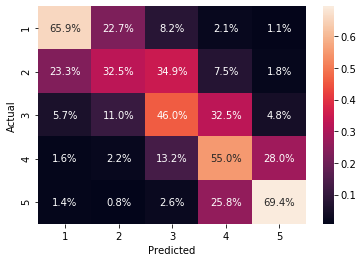

In [76]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_lemmatization,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 6 - POS Tag

In [85]:
tagger = pos_tag()
analyzer_tagger = CountVectorizer().build_analyzer()

TypeError: ignored

In [84]:
pos = Pipeline([
    ('vect', CountVectorizer()),
    ('pos', pos_tag())
    ('nb', MultinomialNB())
])

TypeError: ignored